In [7]:
import dataloader
import utils
import figures

import numpy as np
import pandas as pd

In [3]:
samples, sample_genes, sample_barcodes = dataloader.load_processed_spots()
positions = dataloader.load_positions(sample_barcodes)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.var` of view, copying.


In [8]:
lines = open('data/time_labels.txt').readlines()
times = np.array([int(line.strip('\n').split(',')[1]) for line in lines])
time_barcodes = np.array([line.strip('\n').split(',')[0] for line in lines])

index = []
sample_index = []
for time in np.unique(times):
    index.append(time)
    barcode = time_barcodes[times == time][0]
    barcode_i = np.argmax(sample_barcodes == barcode)
    sample_index.append(barcode_i)
sample_df = pd.DataFrame(samples[sample_index], columns=sample_genes, index=index)

In [12]:
lags = 2
W_dy = utils.learn_dbn(sample_df, lags)
W = utils.adjacency_matrix(W_dy)
utils.mse(W_dy, sample_df, lags)

0.028107254192563828

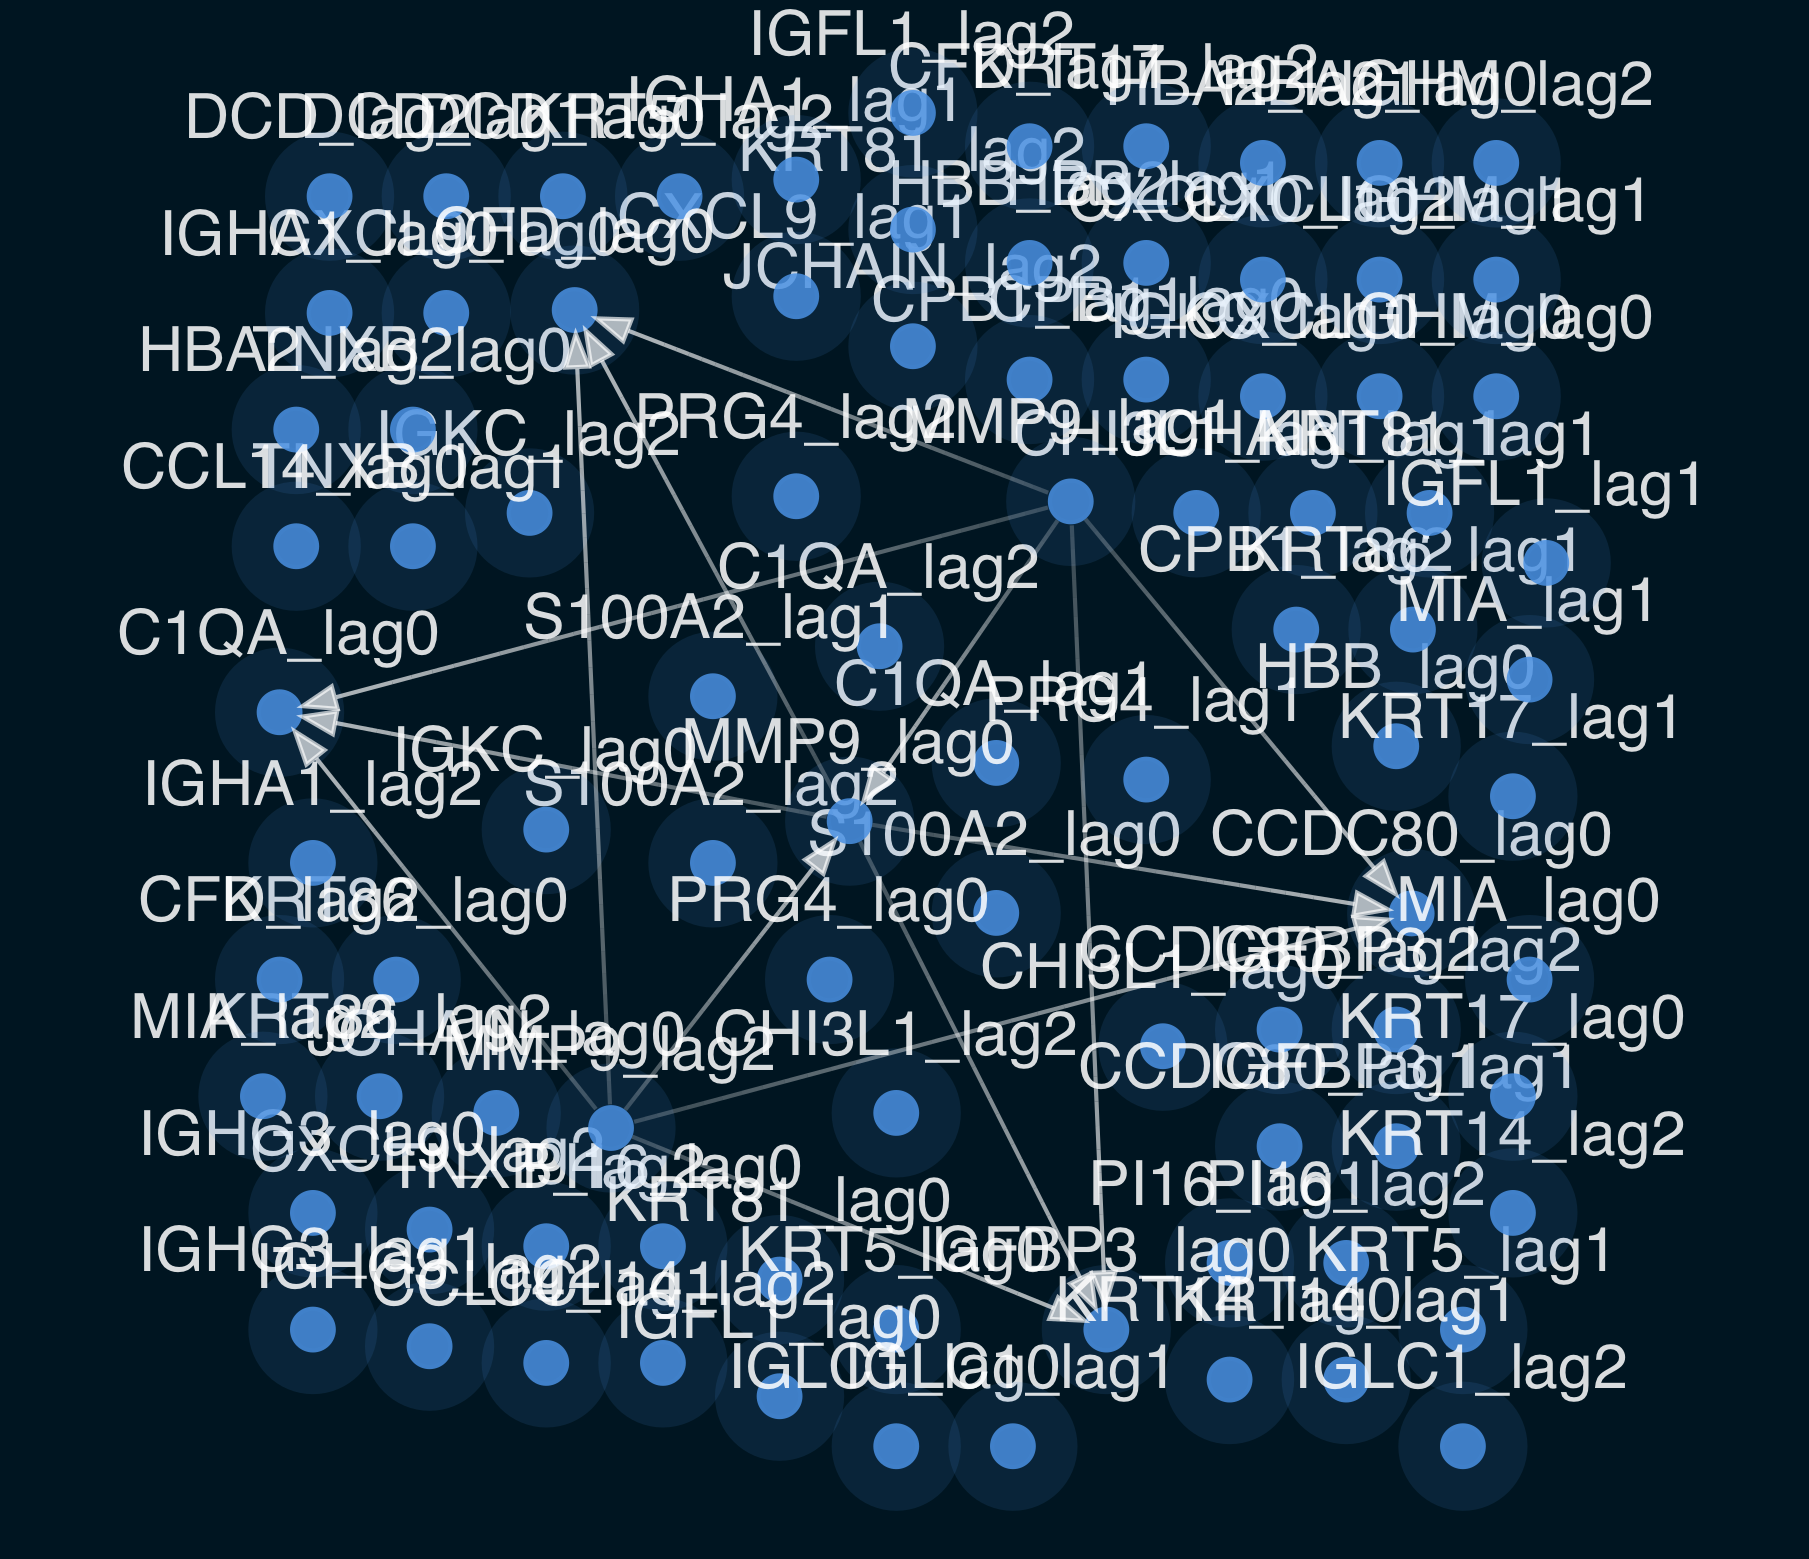

In [14]:
from IPython.display import Image
img = figures.visualize_dbn(W_dy)
Image(img)

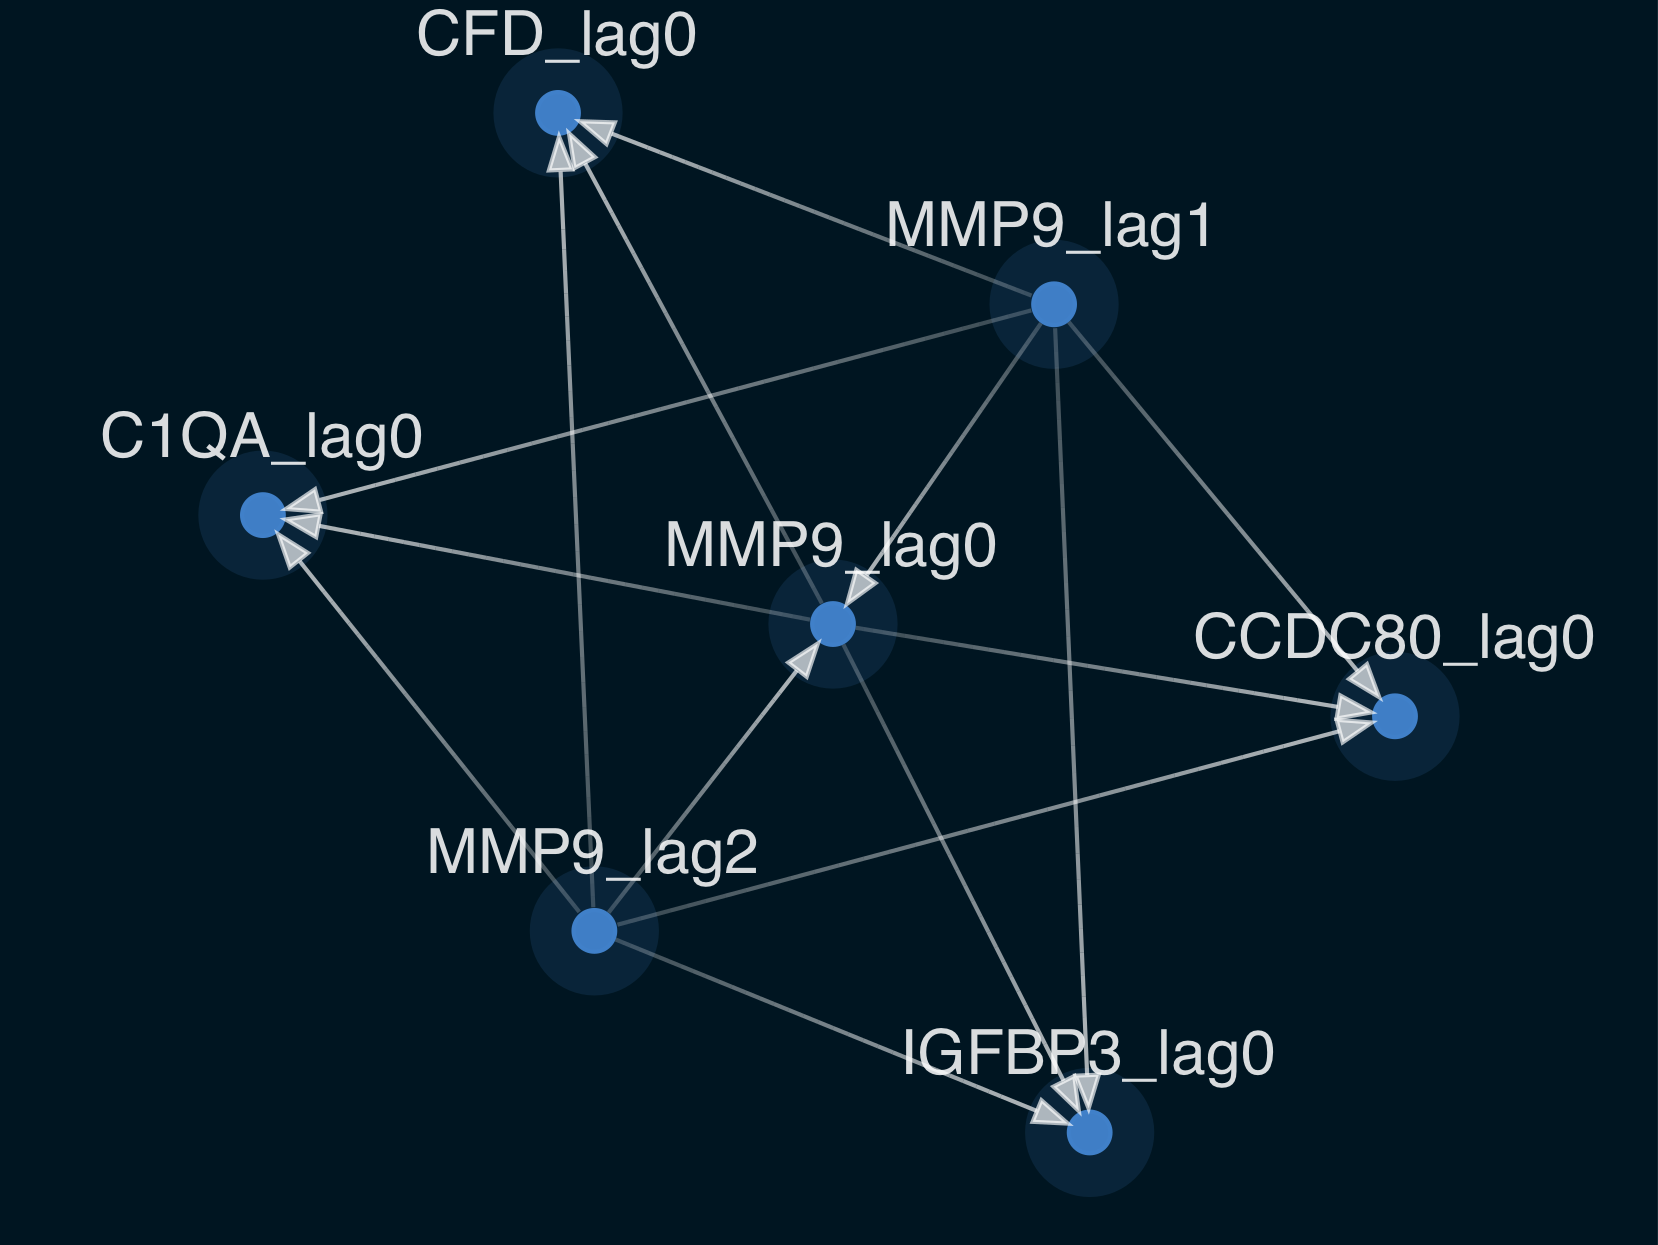

In [16]:
W_cleaned = utils.largest_subgraph(W_dy)
img = figures.visualize_dbn(W_cleaned)
Image(img)